<a class="anchor" id="0"></a>
# MNIST - Deep Neural Network with Keras

In [2]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop




# 3. MNIST dataset <a class="anchor" id="3"></a>




- MNIST is a collection of handwritten digits ranging from the number 0 to 9.

- It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels.



In [3]:
# import dataset
from keras.datasets import mnist

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


# 4. Data visualization <a class="anchor" id="4"></a>




- The following code will help to sample the 25 random MNIST digits and visualize them.

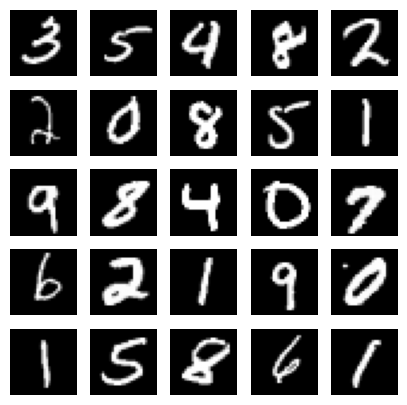

In [4]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

# 5. Designing model architecture <a class="anchor" id="5"></a>






---





## 5.1 Import Keras layers <a class="anchor" id="5.1"></a>

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

## 5.2 Compute the number of labels <a class="anchor" id="5.2"></a>



In [7]:
# compute the number of labels
num_labels = len(np.unique(y_train))

## 5.3 One-Hot Encoding <a class="anchor" id="5.3"></a>

- At this point, the labels are in digits format, 0 to 9.

- This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class.

- A more suitable format is called a one-hot vector, a 10-dim vector with all elements 0, except for the index of the digit class.

- For example, if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0]. The first label has index 0.

- The following lines convert each label into a one-hot vector:

In [8]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 5.4 Data Preprocessing <a class="anchor" id="5.4"></a>




In [9]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [10]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [11]:
x_train.shape

(60000, 784)

In [12]:
x_test.shape

(10000, 784)

## 5.5 Setting network parameters <a class="anchor" id="5.5"></a>

- Now, we will set the network parameters as follows:

In [13]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

## 5.6 Designing the model architecture <a class="anchor" id="5.6"></a>




In [15]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units,activation='relu', input_dim=input_size))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 5.7 View model summary <a class="anchor" id="5.7"></a>

- Keras library provides us **summary()** method to check the model description.

In [16]:
# View Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)


- The total number of parameters required can be computed as follows:

  - From input to Dense layer: 784 × 256 + 256 = 200,960.
  
  - From first Dense to second Dense: 256 × 256 + 256 = 65,792.
  
  - From second Dense to the output layer: 10 × 256 + 10 = 2,570.
  
  - The total is 200,690 + 65,972 + 2,570 = 269,322.

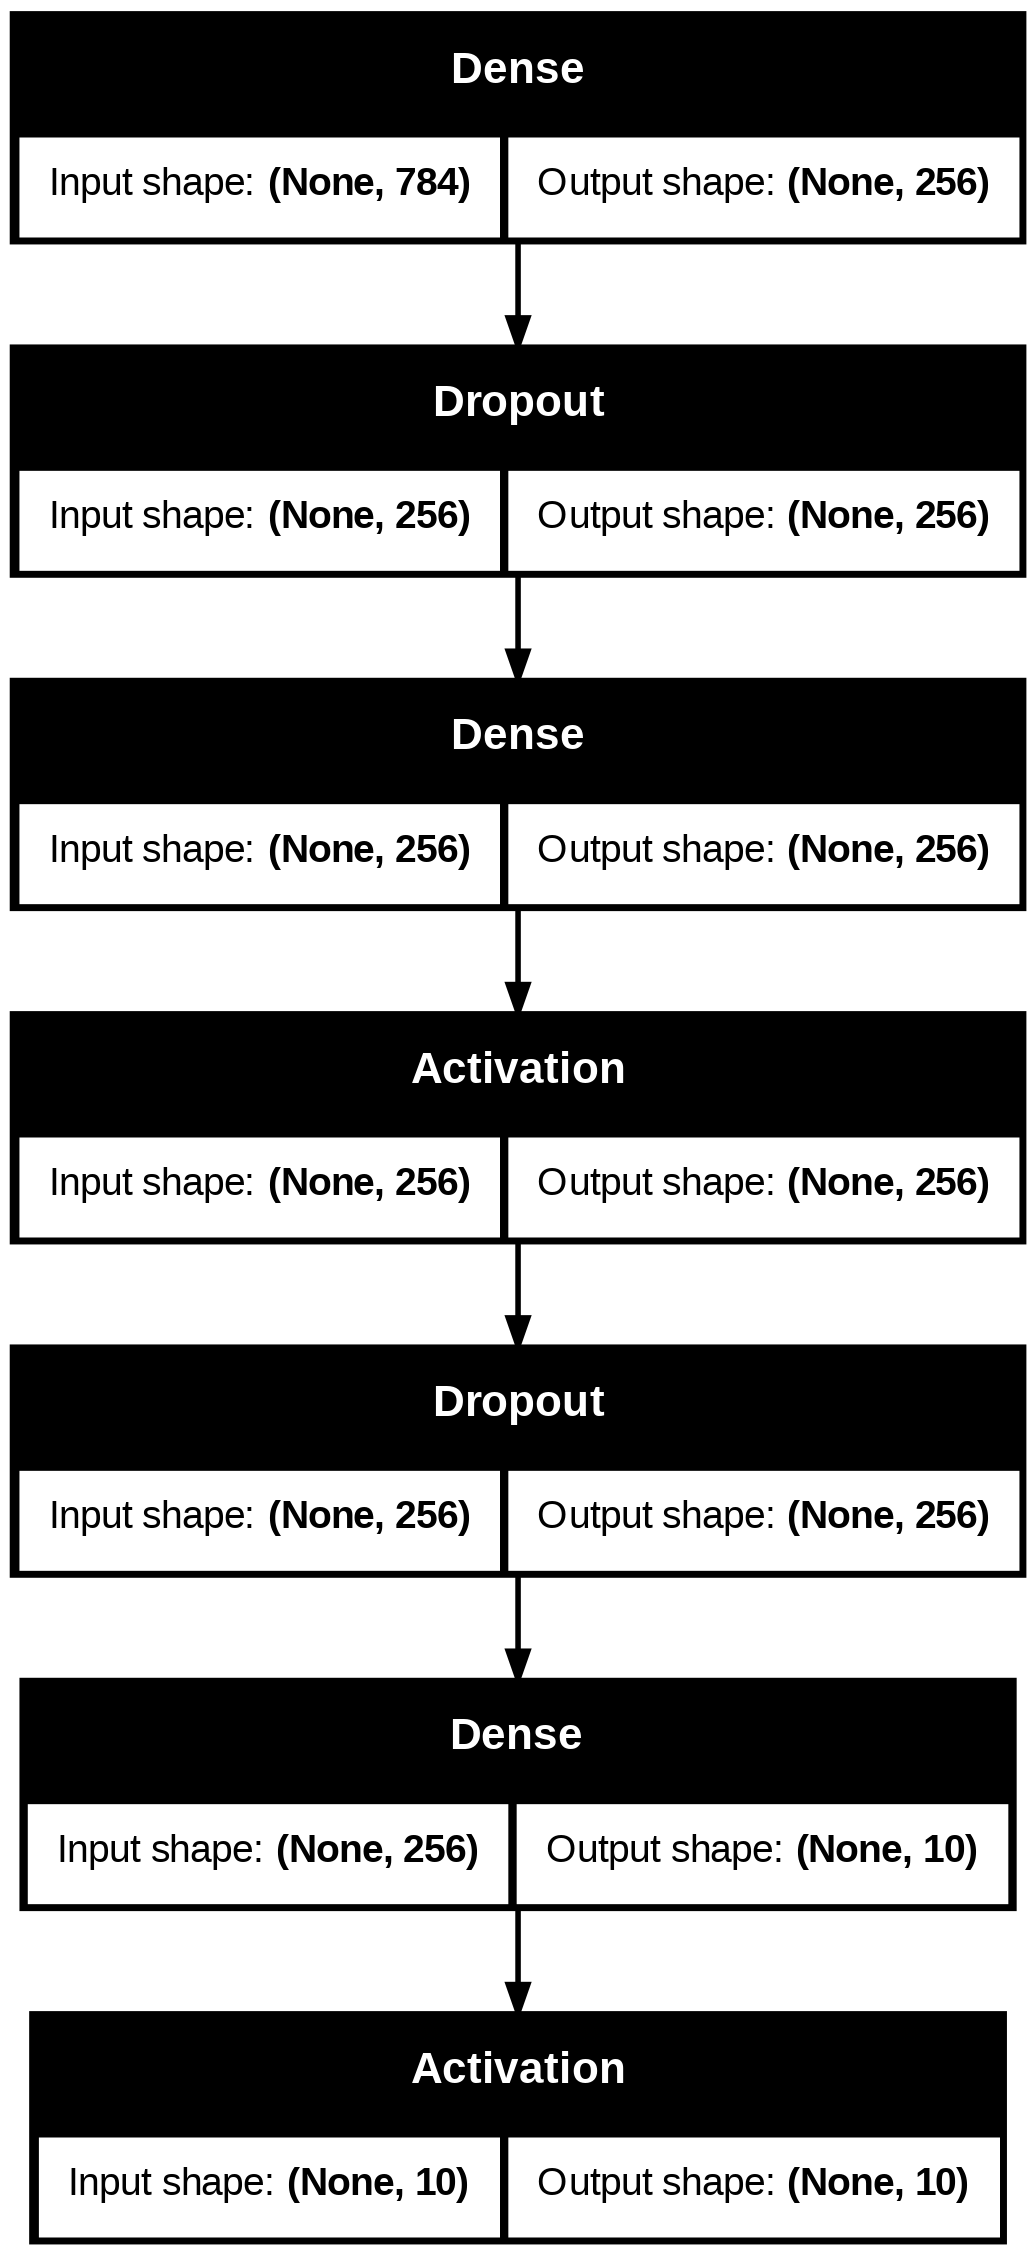

In [17]:
# Plot the model
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# 6. Implement MLP model using Keras <a class="anchor" id="6"></a>



## 6.1 Compile the model with compile() method <a class="anchor" id="6.1"></a>


In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## 6.2 Train the model with fit() method <a class="anchor" id="6.2"></a>

In [19]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7747 - loss: 0.7129
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9379 - loss: 0.2062
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9537 - loss: 0.1543
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9613 - loss: 0.1282
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9663 - loss: 0.1097
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9678 - loss: 0.1014
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9708 - loss: 0.0922
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9739 - loss: 0.0854
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9754 - loss: 0.0784
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9756 - loss: 0.0763
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9773 - loss: 0.0711
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12

## 6.3 Evaluating model performance with evaluate() method <a class="anchor" id="6.3"></a>

In [20]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9795 - loss: 0.0740

Test accuracy: 98.3%
